In [1]:
print("https://github.com/smirsham/DSCI-100-Project_Sina.git")

[1] "https://github.com/smirsham/DSCI-100-Project_Sina.git"


In [2]:
#install.packages(c(
#  "IRkernel",
#  "tidyverse",
#  "lubridate",
#  "janitor",
#  "broom",
#  "tidymodels"
#))
#IRkernel::installspec()


library(tidyverse)
library(lubridate)
library(janitor)
library(broom)
library(tidymodels)
source('cleanup.R')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ dials        1.3.0     ✔ rsample      1.2.1
✔ infer        1.0.7     ✔ tune         1.1.2
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.0.1
✔ recipes      1.1.0     ✔ yardstick    1.3.1

── Conflicts ────────────────────────────────

# Predicting Newsletter Subscription on a UBC Minecraft Server

## Introduction

### Background  
Frank Wood’s research group at UBC runs a Minecraft server to study player behavior.  
They’d like to target newsletter recruitment to those most likely to subscribe and ensure they have enough server resources for active players.

### Research Question  
**Can a player’s total cumulative play-time (`total_minutes`) and average session length (`mean_session`) predict whether they subscribe to the game’s newsletter?**

- **Response variable:** `newsletter_subscribed` (factor: “no” / “yes”)  
- **Explanatory variables:**  
  - `total_minutes` (numeric; derived from `played_hours`)  
  - `mean_session` (numeric; derived from session timestamps)

In [3]:
players  <- read_csv("data/players.csv")
sessions <- read_csv("data/sessions.csv")

print("Players Data")
head(players)
dim(players)

print("Sessions Data")
head(sessions)
dim(sessions)


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Players Data"


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


[1] 196   7

[1] "Sessions Data"


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


[1] 1535    5

## Data Description

**players.csv** (196 × 7)  
- `hashedEmail` (character): player identifier  
- `played_hours` (numeric): total play time in hours  
- `subscribe` (categorical): whether the player subscribed to the newsletter  
  - Values: `TRUE` / `FALSE` (will be recast to factor levels “no”/“yes”)

**sessions.csv** (1535 × 5)  
- `hashedEmail` (character): player identifier  
- `start_time`, `end_time` (character): session timestamps  

**Notes & potential issues**  
- Timestamps require parsing; time zone unknown.  
- Players with no recorded sessions will be dropped before modeling.  
- We’ll convert `subscribe` into a factor with levels “no” and “yes.”

In [4]:
sessions_parsed <- sessions |>
    mutate(
    start_ts = dmy_hm(start_time),
    end_ts = dmy_hm(end_time),
    session_minutes = as.numeric(difftime(end_ts, start_ts, units="mins"))
    )
head(sessions_parsed$session_minutes)

[1]  12  13  23  36  11 122

In [5]:
session_agg <- sessions_parsed |> 
    group_by(hashedEmail) |>
    summarize(
    mean_session = mean(session_minutes, na.rm=TRUE),
    n_sessions = n()
    )
head(session_agg)

hashedEmail,mean_session,n_sessions
<chr>,<dbl>,<int>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,53.00000,2
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,30.00000,1
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,11.00000,1
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,32.15385,13
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,35.00000,2
11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4,10.00000,1


In [6]:
players_clean <- players |>
    clean_names() |>
    rename(player_id = hashed_email) |>
    mutate(
    total_minutes = played_hours * 60,
    newsletter_subscribed = factor(subscribe, levels = c(FALSE, TRUE),labels = c("no","yes"))) |>
    select(player_id, total_minutes, newsletter_subscribed)

head(players_clean)
dim(players_clean)

player_id,total_minutes,newsletter_subscribed
<chr>,<dbl>,<fct>
f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,1818,yes
f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,228,yes
b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0,no
23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,42,yes
7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,6,yes
f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0,yes


[1] 196   3

In [7]:
table(players_clean$newsletter_subscribed) |> as.data.frame()

Var1,Freq
<fct>,<int>
no,52
yes,144


**Newsletter Subscription (raw players; n=196):**  
- no  : 52  
- yes : 144  

In [8]:
df <- players_clean |>
    left_join(session_agg, by = c("player_id" = "hashedEmail")) |>
    drop_na()

dim(df)

[1] 125   5

In [9]:
table(df$newsletter_subscribed) |> as.data.frame()

Var1,Freq
<fct>,<int>
no,32
yes,93


**Newsletter Subscription (active players; n=125):**  
- no  : 32  
- yes : 93  

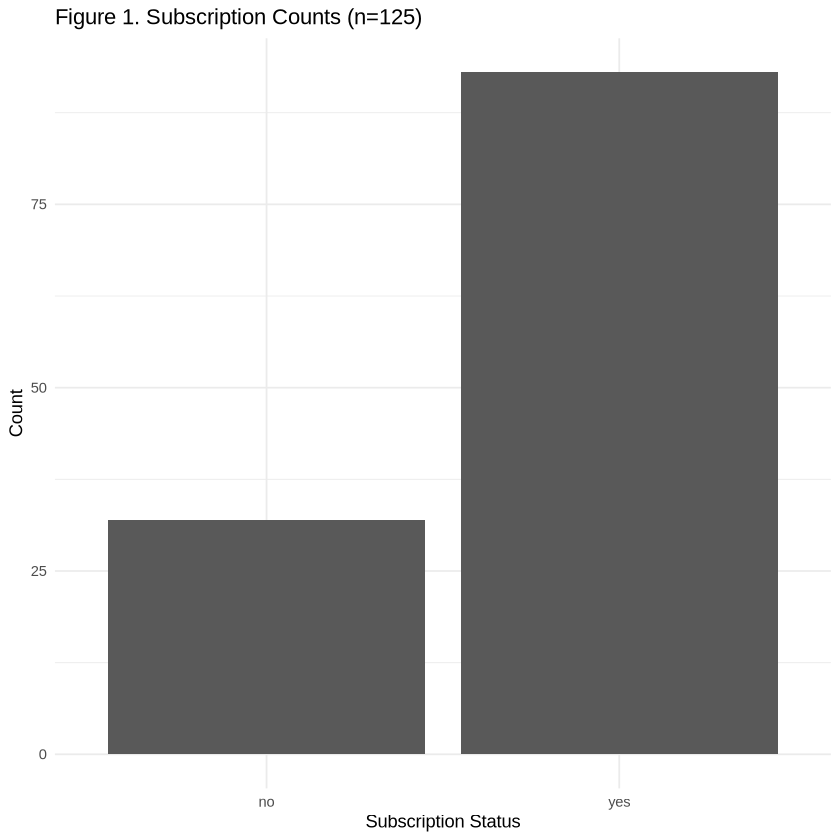

In [10]:
subscriptions <- df |>
    ggplot(aes(x=newsletter_subscribed)) + geom_bar() +
  labs(
    title = "Figure 1. Subscription Counts (n=125)",
    x = "Subscription Status", y = "Count"
  ) +
  theme_minimal()

subscriptions

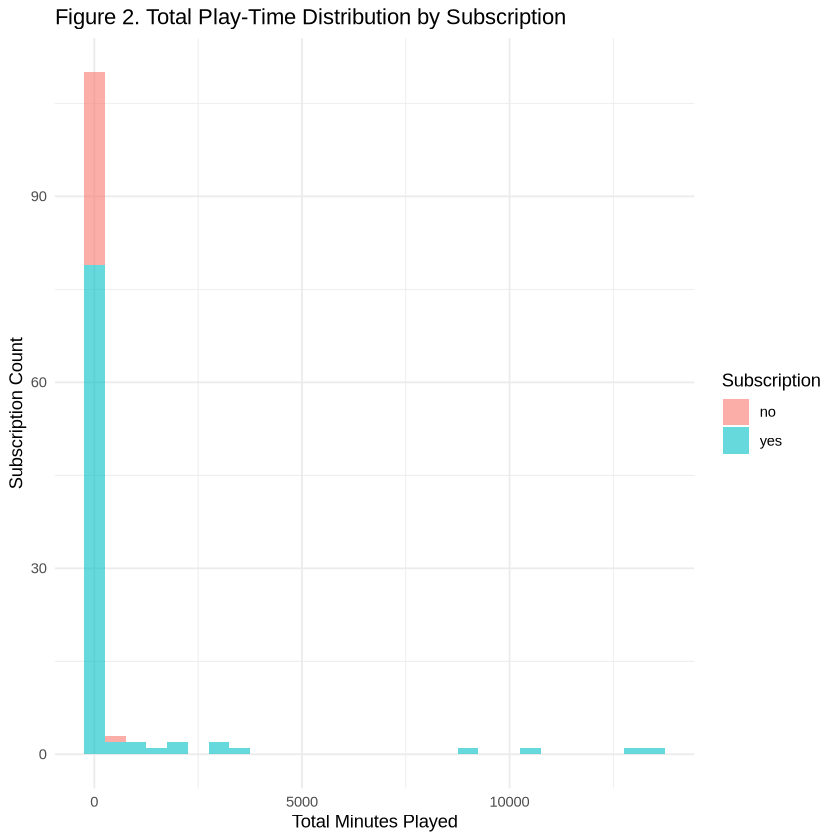

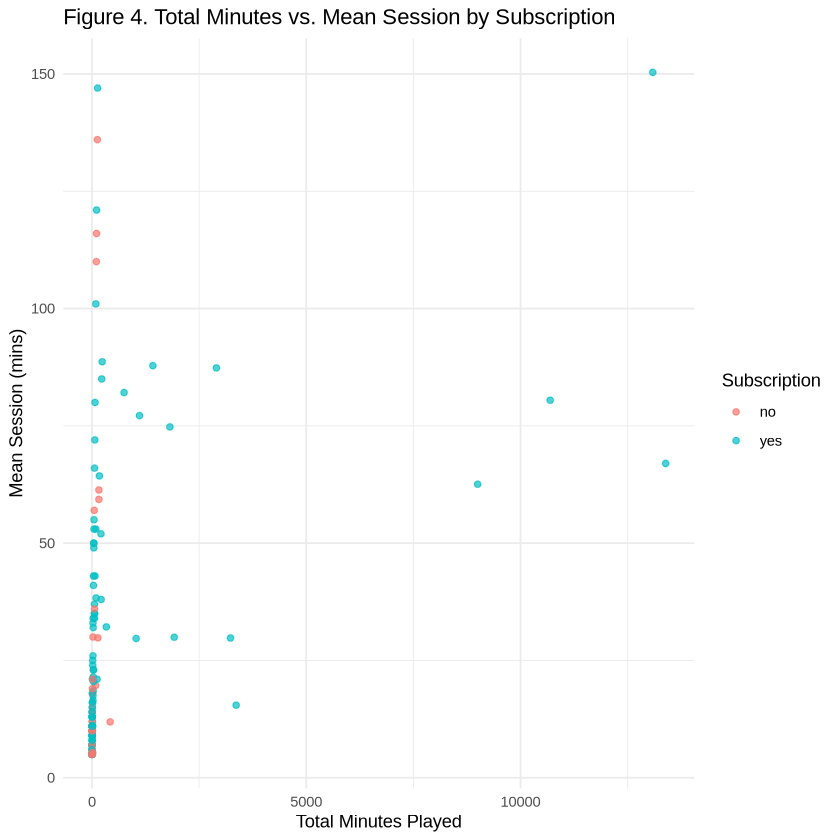

In [11]:
timeplayed_subscription <- df|>
ggplot(aes(x = total_minutes, fill = newsletter_subscribed)) +
  geom_histogram(binwidth = 500, alpha = 0.6) +
  labs(
    title = "Figure 2. Total Play-Time Distribution by Subscription",
    x     = "Total Minutes Played",
    y     = "Subscription Count",
    fill  = "Subscription"
  ) +
  theme_minimal()

timeplayed_mean <- df |>
ggplot(aes(x = total_minutes, y = mean_session,color = newsletter_subscribed)) +
  geom_point(alpha = 0.7) +
  labs(
    title = "Figure 4. Total Minutes vs. Mean Session by Subscription",
    x     = "Total Minutes Played",
    y     = "Mean Session (mins)",
    color = "Subscription"
  ) +
  theme_minimal()

timeplayed_subscription
timeplayed_mean

**Insights:**  
- The histogram shows subscribers are skewed to higher total play-time.  
- The scatter plot reveals that subscribers spend more time on each session and play more often.

In [12]:
set.seed(123)
split <- initial_split(df, prop = 0.8, strata = "newsletter_subscribed")
train <- training(split)
test  <- testing(split)

*Use an 80/20 split to maintain subscription balance.*

In [13]:
rec <- recipe(newsletter_subscribed ~ total_minutes + mean_session, data = train) |>
  step_center(all_predictors()) |>
  step_scale(all_predictors())

*We center and scale predictors to ensure model stability and interpretability.*

In [14]:
log_spec <- logistic_reg() |>
  set_engine("glm") |>
  set_mode("classification")

*Define a logistic regression model for our binary outcome.*

In [15]:
log_wf <- workflow() |>
  add_recipe(rec) |>
  add_model(log_spec) |>
  fit(data = train)

*Bundle recipe and model in a single pipeline for clarity.*

In [16]:
preds <- log_wf |>
    predict(new_data = test, type = "class") |>
    bind_cols(test)

preds |> conf_mat(truth = newsletter_subscribed, estimate = .pred_class)

preds |> metrics(truth = newsletter_subscribed, estimate = .pred_class)

          Truth
Prediction no yes
       no   0   0
       yes  7  19

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7307692
kap,binary,0.0000000


**Interpreting the Results**

- **Confusion Matrix**  
  - The model predicted **“yes” for everyone**, yielding:  
    - True Positives (subscribers correctly predicted): 19  
    - False Positives (non-subscribers mislabeled): 7  
    - True Negatives: 0  
    - False Negatives: 0  

- **Accuracy (0.73)**  
  - The model is correct 73% of the time on the test set.

- **Kappa (0.00)**  
  - Kappa = 0 indicates performance is not better than simply predicting the majority class.

**What this means**  
Our current model defaults to predicting “yes” for all players.  
While it catches all actual subscribers, it also misclassifies several non-subscribers.  
We should consider tuning thresholds or adding features so the model learns to predict “no” in appropriate cases.

## Discussion

**Key Findings:**  
- Total play-time is a strong predictor of subscription.  
- Average session length adds a smaller effect.

**Impact:**
- This outcome was unexpected as the model did not predict "no" a single time.
- Such findings could be misleading and problematic.

**Implications:**  
- Target engagement-heavy players for newsletter outreach.  
- Plan server resources around user activity levels.

**Future Work:**  
- Include recency of last sessio.  
- Explore other classification methods (tree-based, KNN) using similar workflows.
